In [2]:
import os
import numpy as np
import pandas as pd
import pandas.io.data
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.finance import candlestick
from matplotlib.dates import date2num
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 10})

In [110]:
stocks_to_pull = 'AAPL', 'TSLA', 'EBAY'

def pullData(stock, endYear):
    print 'Currently Pulling', stock
    print str(datetime.datetime.fromtimestamp(int(time.time())).strftime('%Y-%m-%d %H:%M:%S'))
    df = pandas.io.data.get_data_yahoo(stock, 
        start = datetime.datetime(endYear, 1, 1),
        end = datetime.datetime.now())
    df.to_csv('stocks/' + stock + '.csv')

In [111]:
for stock in stocks_to_pull:
    pullData(stock, 2014)

Currently Pulling AAPL
2016-01-21 20:19:29
Currently Pulling TSLA
2016-01-21 20:19:30
Currently Pulling EBAY
2016-01-21 20:19:31


In [124]:
def movingAverages(values, window):
    return pd.rolling_mean(values, window)

In [173]:
def graphData(stock_symbol, MA1, MA2):
    # read in df 
    base_dir = 'stocks'
    stockFile = os.path.join(base_dir, stock_symbol + '.csv')
    stock = pd.read_csv(stockFile)
    # convert datetime
    stock['Date'] = pd.to_datetime(stock.Date)
    stock.Date = mdates.date2num(stock.Date.dt.to_pydatetime())

    date, closep, highp, lowp, openp, volume = \
    stock['Date'], stock['Open'], stock['High'], stock['Low'], stock['Close'], stock['Volume']
    
    # get moving averages
    av1 = movingAverages(closep, MA1)
    av2 = movingAverages(closep, MA2)
    
    # cut out non data
    sp = len(date[MA2 - 1:])
    
    # fill candlestick array
    x = 0
    y = len(date)
    candleArray = []
    while x < y:
        appendLine = date[x], openp[x], closep[x], highp[x], lowp[x], volume[x]
        candleArray.append(appendLine)
        x += 1
       

    fig = plt.figure(facecolor='#07000d', figsize=(18,6))
    
    ax0 = plt.subplot2grid((5,4), (0,0), rowspan = 1, colspan = 4, axisbg='#07000d')
    ax0.spines['bottom'].set_color('#5998ff')
    ax0.spines['top'].set_color('#5998ff')
    ax0.spines['left'].set_color('#5998ff')
    ax0.spines['right'].set_color('#5998ff')
    ax0.tick_params(axis = 'y', colors = 'w')
    ax0.tick_params(axis = 'x', colors = 'w')
    ax0.yaxis.label.set_color('w')
    ax0.grid(False)
    plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune = 'lower'))
    plt.ylabel('RSI')
    
    
    ax1 = plt.subplot2grid((5,4), (1,0), rowspan = 4, colspan = 4, axisbg='#07000d')
    # plot candlestick
    candlestick(ax1, candleArray, width = 1, colorup = '#53c156', colordown = '#ff1717')
    # plot moving averages
    ax1.plot(date[-sp:], av1[-sp:], '#5998ff', label = '{} SMA'.format(MA1), linewidth = 1.5)
    ax1.plot(date[-sp:], av2[-sp:], '#e1edf9', label = '{} SMA'.format(MA2), linewidth = 1.5)
    # plot params 
    ax1.grid(True, color = 'w')
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.yaxis.label.set_color('w')
    ax1.spines['bottom'].set_color('#5998ff')
    ax1.spines['top'].set_color('#5998ff')
    ax1.spines['left'].set_color('#5998ff')
    ax1.spines['right'].set_color('#5998ff')
    ax1.tick_params(axis = 'y', colors = 'w')
    ax1.tick_params(axis = 'x', colors = 'w')
    plt.ylabel('Price')
    plt.xticks(rotation = 45)
    plt.legend(loc = 'topright', prop = {'size': 8}, fancybox = True)

    ax1v = ax1.twinx()
    ax1v.fill_between(date, 0, volume, facecolor = '#00ffe8', alpha = 0.5)
    ax1v.grid(False)
    ax1v.axes.yaxis.set_ticklabels([])
    ax1v.spines['bottom'].set_color('#5998ff')
    ax1v.spines['top'].set_color('#5998ff')
    ax1v.spines['left'].set_color('#5998ff')
    ax1v.spines['right'].set_color('#5998ff')
    ax1v.set_ylim(0, 3 * volume.max())
    ax1v.tick_params(axis = 'y', colors = 'w')
    ax1v.tick_params(axis = 'x', colors = 'w')
    plt.setp(ax0.get_xticklabels(), visible = False)
    plt.suptitle('{}'.format(stock_symbol), size = 20, color = 'w')
    plt.subplots_adjust(hspace = 0)
    plt.show()
#     fig.savefig('example.png',facecolor=fig.get_facecolor())

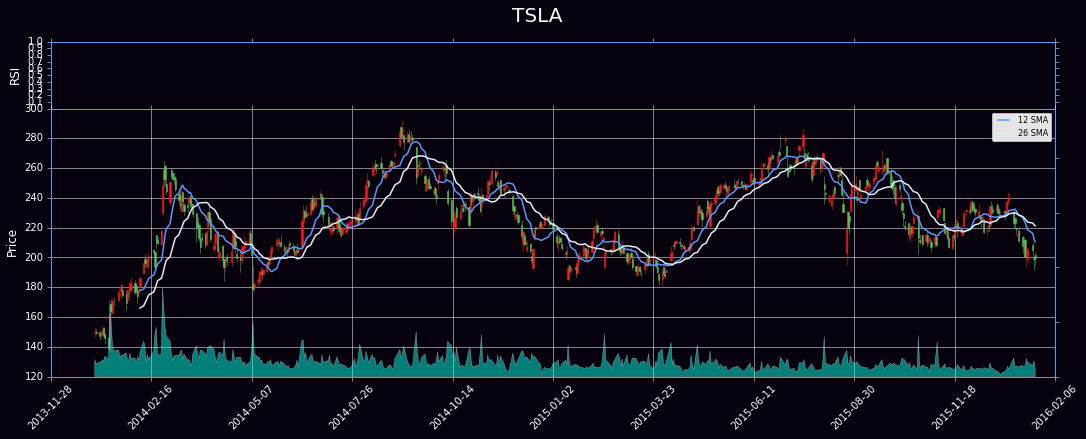

In [174]:
graphData('TSLA', 12, 26) 